# D213 - Advanced Data Analytics
### Task 1: Time Series Modeling 
___

## Part I: Research Question

### A1: Proposal of Question

### A2: Objectives and Goals

## Part II: Method Justification

### B1: Summary of Assumptions

## Part III: Data Preparation

### C1: Line Graph Visualization

In [32]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller

df = pd.read_csv('./data/medical_time_series.csv')
df.head()

,Day,Revenue
0,1,0.000000
1,2,-0.292356
2,3,-0.327772
3,4,-0.339987
4,5,-0.124888


<Axes: title={'center': 'Medical Admissions Revenue'}, xlabel='Time Horizon', ylabel='Revenue (in millions)'>

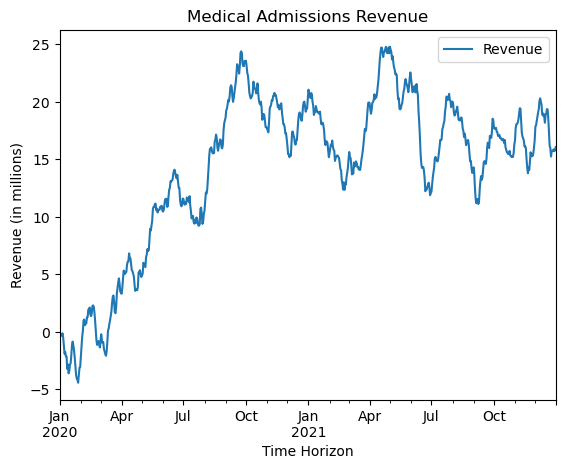

In [33]:
# Set datetime index and plot to line graph
df = df.set_index(pd.date_range(start='2020-1-1', periods=df.shape[0], freq='D'))
df.drop('Day', axis=1, inplace=True)
df.plot(title='Medical Admissions Revenue', ylabel='Revenue (in millions)', xlabel='Time Horizon')

### C2: Time Step Formatting

The time step formatting of the above time series is in `datetime` format. The frequency of the time series is **daily** and the total length is **731 days**.

### C3: Stationarity

In [34]:
# Evaluate the stationarity of time series data and print results
def adf_test(ts):
    df = adfuller(ts, autolag='AIC')
    results = pd.DataFrame(df[:4], columns=['Results '], dtype=object)
    results.index=['Test Statistic', 'p-value', 'Num Lags', 'Num Observations']
    print('Results of Augmented Dickey-Fuller Test:\n\n', results)
    if df[1] <= 0.05:
        print('\nStrong evidence against the null hypothesis')
        print('Reject the null hypothesis')
        print('Data may have no unit root and is stationary')
    else:
        print('\nWeak evidence against the null hypothesis')
        print('Fail to reject the null hypothesis')
        print('Data may have a unit root and is non-stationary')

# Run the ADF test on the raw time series data
adf_test(df['Revenue'])

Results of Augmented Dickey-Fuller Test:

                   Results 
Test Statistic   -2.218319
p-value           0.199664
Num Lags               1.0
Num Observations     729.0

Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data may have a unit root and is non-stationary


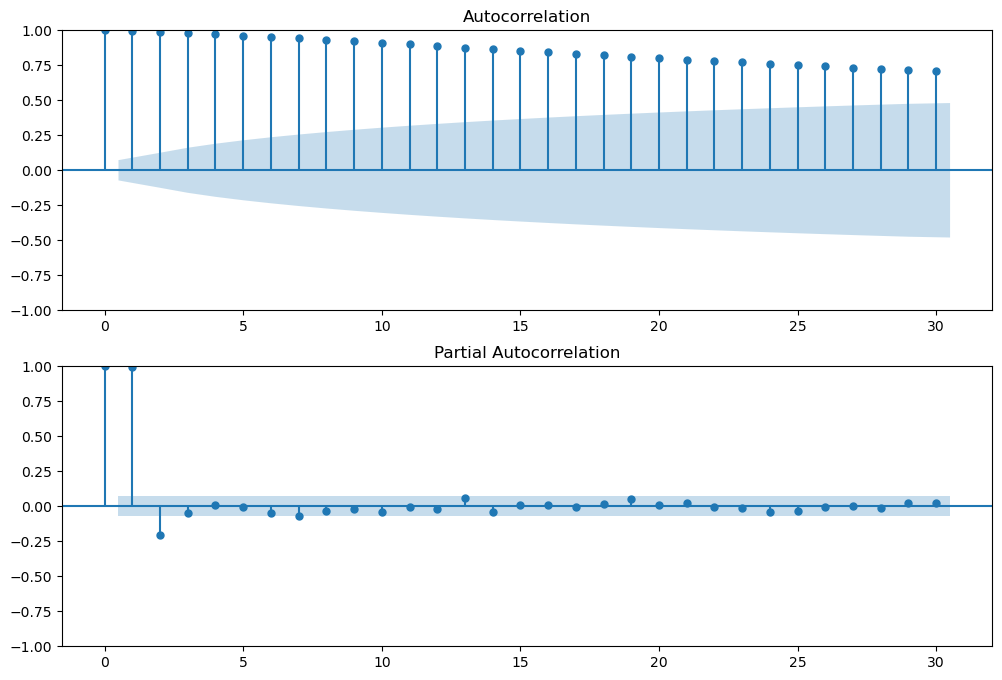

In [47]:
# Plot stationarity of the raw time series
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df['Revenue'], ax=ax1, lags=30)
plot_pacf(df['Revenue'], ax=ax2, lags=30, method='ywm')
plt.show()


<Axes: title={'center': 'Differenced (Daily) Medical Admissions Revenue'}, xlabel='Time Horizon', ylabel='Revenue (in millions)'>

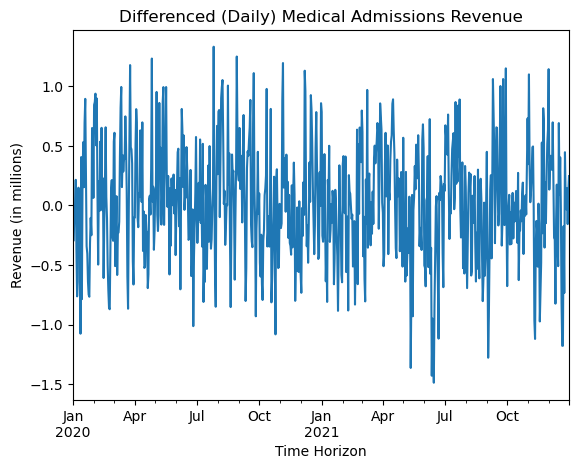

In [36]:
# Difference the time series and plot to line graph
df['Revenue_diff'] = df['Revenue'].diff()
df['Revenue_diff'].plot(title='Differenced (Daily) Medical Admissions Revenue', ylabel='Revenue (in millions)', xlabel='Time Horizon')

<Axes: title={'center': 'Percent Changes (Daily) Medical Admissions Revenue'}, xlabel='Time Horizon', ylabel='Revenue (in millions)'>

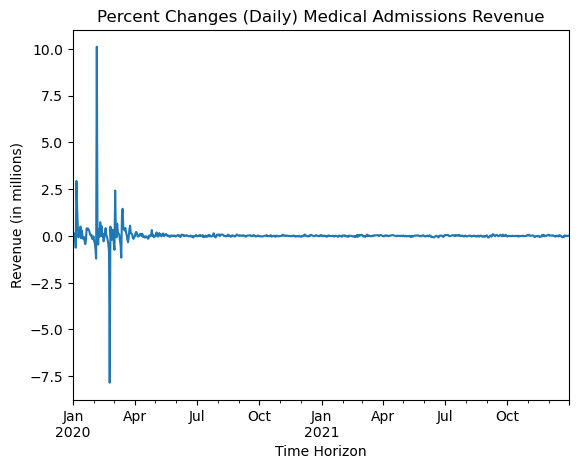

In [37]:
# Get pct changes from the time series and plot to line graph
df['Revenue_chg'] = df['Revenue'].pct_change()
df['Revenue_chg'].plot(title='Percent Changes (Daily) Medical Admissions Revenue', ylabel='Revenue (in millions)', xlabel='Time Horizon')

In [38]:
# Test stationarity of the differenced time series

adf_test(df['Revenue_diff'].dropna())


Results of Augmented Dickey-Fuller Test:

                    Results 
Test Statistic   -17.374772
p-value                 0.0
Num Lags                0.0
Num Observations      729.0

Strong evidence against the null hypothesis
Reject the null hypothesis
Data may have no unit root and is stationary


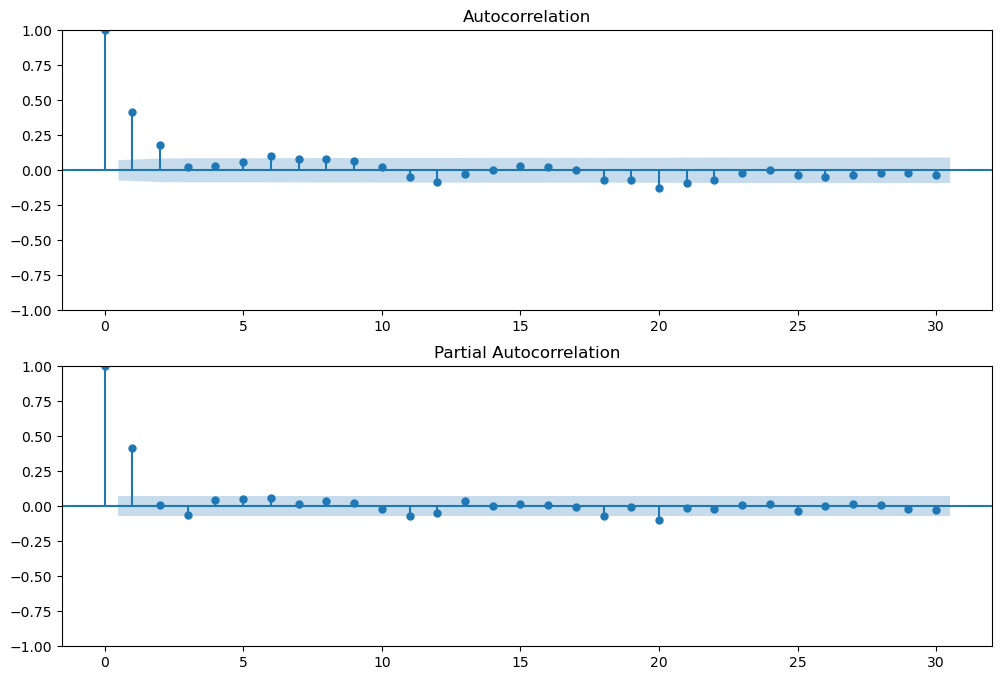

In [46]:
# Plot stationarity of the diffed time series
diff_fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df['Revenue_diff'].dropna(), ax=ax1, lags=30)
plot_pacf(df['Revenue_diff'].dropna(), ax=ax2, lags=30, method='ywm')
plt.show()


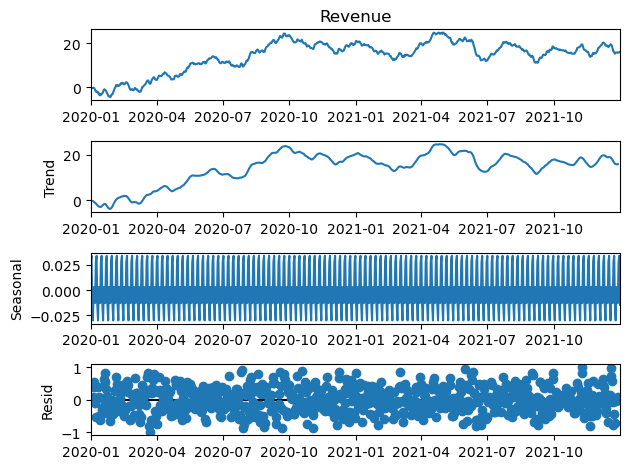

In [41]:
# Evaluate presence or absence of seasonality in the time series
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

seasonaldecomp = seasonal_decompose(df['Revenue'], model='add')
seasonaldecomp_fig = seasonaldecomp.plot()
plt.show()


In [ ]:
df['Revenue']

In [ ]:
df.plot()

In [ ]:
df.pct_change().drop(df.index[:2])

In [ ]:
df['Revenue'].plot()

In [ ]:
df.pct_change().drop(df.index[:2], axis=0)['Revenue']

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot autocorrelation and partial autocorrelation
def plot_acf_pacf(df, lags=20, alpha=0.05):
    fig, ax = plt.subplots(2, figsize=(10, 10))
    ax[0] = plot_acf(df, lags=lags, ax=ax[0], alpha=alpha)
    ax[1] = plot_pacf(df, lags=lags, ax=ax[1], alpha=alpha, method='ywm')
    plt.show()

plot_acf_pacf(df=df.pct_change().drop(df.index[:2], axis=0)['Revenue'], lags=20)

### C4: Steps to Prepare the Data

### C5: Prepared Dataset

## Part IV: Model Identification and Analysis

### D1: Report Findings and Visualizations

### D2: ARIMA Model

### D3: Forecasting Using ARIMA Model

### D4: Output and Calculations

### D5: Code

## Part V: Data Summary and Implications

### E1: Results

### E2: Annotated Visualization

### E3: Recommendations